In [8]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
def simulate_circuit(gate_name, gate):
    #create a quantum circuit with one qubit and one classical bit for measurement
    qc = QuantumCircuit(1, 1)
    qc.h(0)  
    gate(qc, 0)  
    qc.measure(0, 0)  
    
    print(f"Quantum Circuit with {gate_name} gate:")
    fig, ax = plt.subplots()
    display(qc.draw('mpl', ax=ax))
    display(fig)
    plt.close(fig)

    #simulate the circuit using AerSimulator for measurement
    simulator = AerSimulator(method='automatic')
    result = simulator.run(qc, shots=1024).result()
    counts = result.get_counts(qc)

    print(f"Measurement Results for {gate_name} gate:")
    fig, ax = plt.subplots()
    #display(plot_histogram(counts, ax=ax))
    #plt.close(fig)
    plot_histogram(counts, ax=ax)
    display(fig)
    plt.close(fig)

    #create a separate circuit for statevector analysis (no measurement)
    qc_state = QuantumCircuit(1)
    qc_state.h(0)
    gate(qc_state, 0)
    qc_state.save_statevector()

    #simulate statevector using AerSimulator
    simulator_state = AerSimulator(method='statevector')
    result_state = simulator_state.run(qc_state).result()
    statevector = result_state.get_statevector(qc_state)

    print(f"Bloch Sphere for {gate_name} gate:")
    #display(plot_bloch_multivector(statevector))
    #plt.close()
    fig = plot_bloch_multivector(statevector)
    display(fig)
    plt.close()
    


Quantum Circuit with X gate:


None

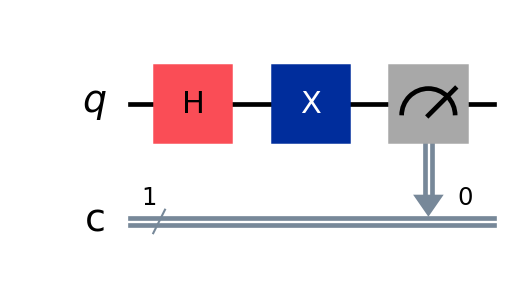

Measurement Results for X gate:


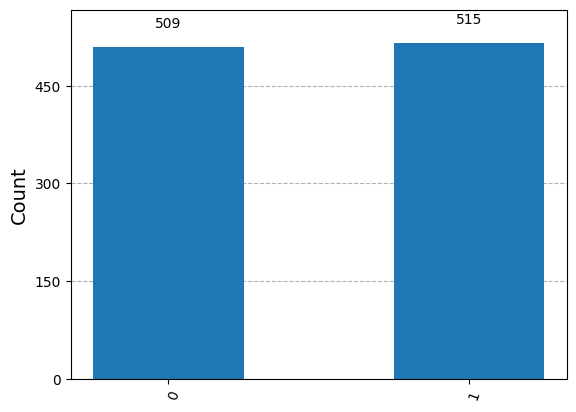

Bloch Sphere for X gate:


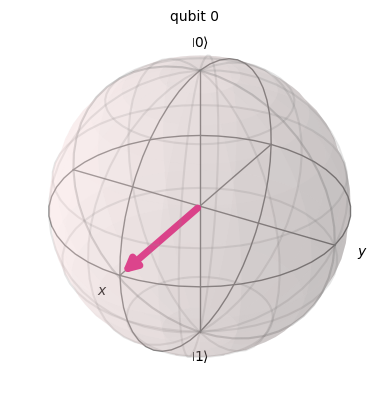

Quantum Circuit with Y gate:


None

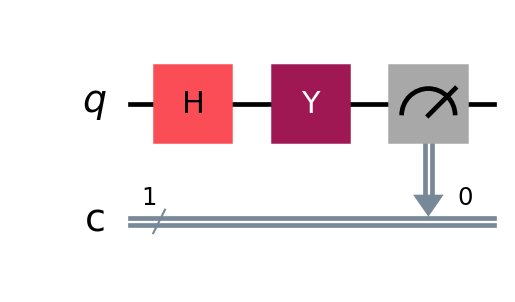

Measurement Results for Y gate:


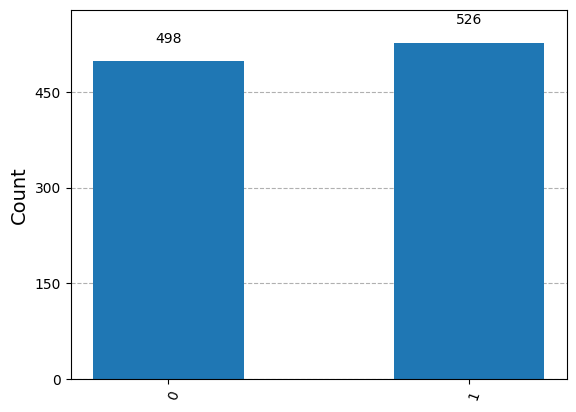

Bloch Sphere for Y gate:


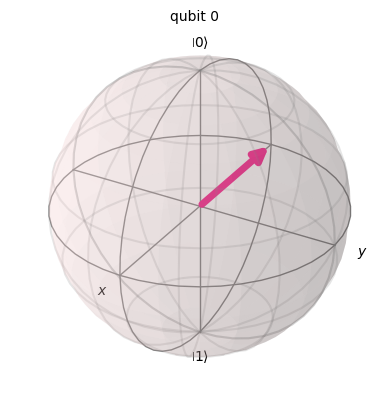

Quantum Circuit with Z gate:


None

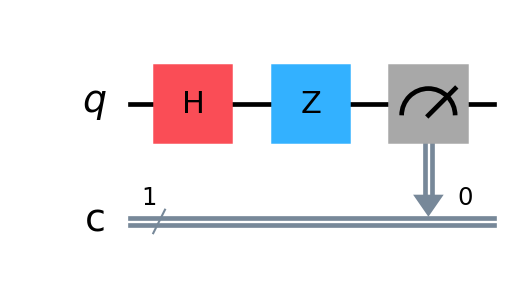

Measurement Results for Z gate:


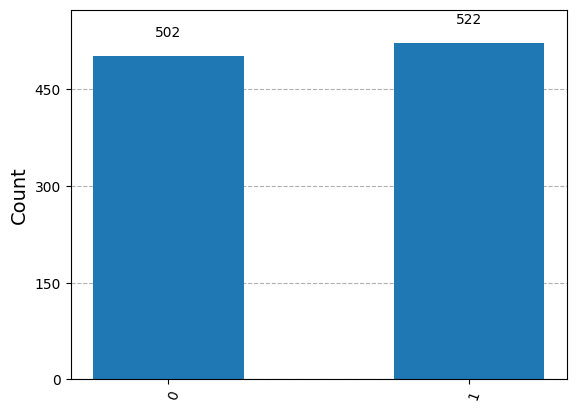

Bloch Sphere for Z gate:


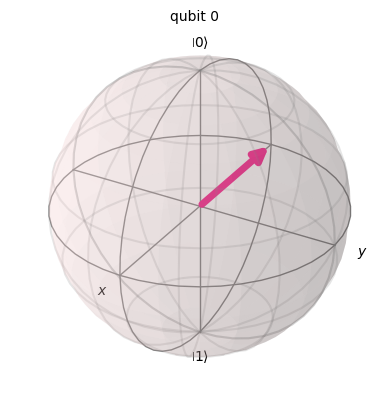

In [28]:
#Test X gate
simulate_circuit("X", lambda qc, q: qc.x(q))

#test Y gate
simulate_circuit("Y", lambda qc, q: qc.y(q))

#test Z gate
simulate_circuit("Z", lambda qc, q: qc.z(q))